# Netflix data analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import pandas_profiling as pp
%matplotlib inline

In [6]:
df = pd.read_csv("netflix_titles.csv")

# df.info()

In [9]:
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1179,81217739,Movie,Mallesham,Raj R,"Jhansi, Priyadarshi Pullikonda, Ananya Nagalla",India,"November 20, 2019",2019,TV-PG,131 min,"Dramas, Independent Movies, International Movies","A self-trained engineer risks debt, love and r..."
1418,81030409,Movie,The House of Flowers Presents: The Funeral,Manolo Caro,"Cecilia Suárez, Aislinn Derbez, Dario Yazbek, ...",NaN,"November 1, 2019",2019,TV-MA,36 min,Movies,The de la Mora siblings publicly mourn the dea...
5846,80099753,TV Show,Versailles,NaN,"George Blagden, Alexander Vlahos, Tygh Runyan,...","France, Canada","March 29, 2019",2018,TV-MA,3 Seasons,"International TV Shows, TV Dramas",King Louis XIV of France commissions a lavish ...


In [12]:
df['type'].unique()
a = df['country']

print(type(a))

<class 'pandas.core.series.Series'>


In [21]:
a.tail()

6229     United States
6230     United States
6231               NaN
6232    United Kingdom
6233     United States
Name: country, dtype: object

In [19]:
for i in a.tail():
    print(i, type(i))

United States <class 'str'>
United States <class 'str'>
nan <class 'float'>
United Kingdom <class 'str'>
United States <class 'str'>


In [41]:
# list(a)
# list(a.unique())

uns_all_countries = [i.split(',') for i in list(a.dropna())]
print(uns_all_countries)

[['United States', ' India', ' South Korea', ' China'], ['United Kingdom'], ['United States'], ['United States'], ['United States'], ['Spain'], ['Bulgaria', ' United States', ' Spain', ' Canada'], ['Chile'], ['United States'], ['United States', ' United Kingdom', ' Denmark', ' Sweden'], ['Netherlands', ' Belgium', ' United Kingdom', ' United States'], ['France', ' Belgium'], ['United States'], ['France', ' Belgium'], ['United States', ' Uruguay'], ['United States'], ['United States'], ['United States'], ['United States', ''], ['Thailand'], ['China', ' Canada', ' United States'], ['United States'], ['Belgium', ' United Kingdom', ' United States'], ['Belgium', ' France'], ['India'], ['India'], ['France'], ['United States'], ['India'], ['United Kingdom'], ['United Kingdom'], ['United States', ' Canada'], ['Thailand'], ['Thailand'], ['Thailand'], ['Thailand'], ['Thailand'], ['Thailand'], ['United States'], ['United States'], ['United States'], ['Pakistan'], ['Canada'], ['United States'], [

In [42]:
mylist = []
for c_list in uns_all_countries:
    for country in c_list:
        mylist.append(country.strip())

In [43]:
# mylist

In [44]:
all_countries = [country.strip() for countrylist in uns_all_countries for country in countrylist]

In [45]:
all_countries

['United States',
 'India',
 'South Korea',
 'China',
 'United Kingdom',
 'United States',
 'United States',
 'United States',
 'Spain',
 'Bulgaria',
 'United States',
 'Spain',
 'Canada',
 'Chile',
 'United States',
 'United States',
 'United Kingdom',
 'Denmark',
 'Sweden',
 'Netherlands',
 'Belgium',
 'United Kingdom',
 'United States',
 'France',
 'Belgium',
 'United States',
 'France',
 'Belgium',
 'United States',
 'Uruguay',
 'United States',
 'United States',
 'United States',
 'United States',
 '',
 'Thailand',
 'China',
 'Canada',
 'United States',
 'United States',
 'Belgium',
 'United Kingdom',
 'United States',
 'Belgium',
 'France',
 'India',
 'India',
 'France',
 'United States',
 'India',
 'United Kingdom',
 'United Kingdom',
 'United States',
 'Canada',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',
 'United States',
 'United States',
 'United States',
 'Pakistan',
 'Canada',
 'United States',
 'India',
 'United States',
 'United Kingdom'

In [46]:
mydict = {}
for e in all_countries:
    if e not in mydict:
        mydict[e] = 1
    else: mydict[e] += 1 

In [47]:
mydict

{'United States': 2610,
 'India': 838,
 'South Korea': 162,
 'China': 120,
 'United Kingdom': 602,
 'Spain': 178,
 'Bulgaria': 8,
 'Canada': 318,
 'Chile': 23,
 'Denmark': 38,
 'Sweden': 33,
 'Netherlands': 37,
 'Belgium': 66,
 'France': 271,
 'Uruguay': 9,
 '': 3,
 'Thailand': 56,
 'Pakistan': 23,
 'Turkey': 87,
 'Brazil': 66,
 'Italy': 67,
 'Indonesia': 52,
 'Ireland': 33,
 'Hong Kong': 97,
 'Morocco': 6,
 'Mexico': 129,
 'Vietnam': 4,
 'Argentina': 68,
 'Nigeria': 36,
 'Japan': 231,
 'Germany': 151,
 'Greece': 8,
 'Norway': 21,
 'Switzerland': 15,
 'United Arab Emirates': 21,
 'Lebanon': 9,
 'Cambodia': 3,
 'Russia': 21,
 'Poland': 27,
 'Israel': 26,
 'Australia': 126,
 'Portugal': 4,
 'Egypt': 54,
 'Taiwan': 75,
 'Austria': 10,
 'Czech Republic': 15,
 'Senegal': 2,
 'Soviet Union': 3,
 'Peru': 9,
 'Ukraine': 3,
 'Malaysia': 21,
 'South Africa': 30,
 'Nepal': 2,
 'Philippines': 47,
 'Serbia': 5,
 'Colombia': 36,
 'Singapore': 30,
 'Luxembourg': 7,
 'West Germany': 5,
 'Cayman Island

<BarContainer object of 111 artists>

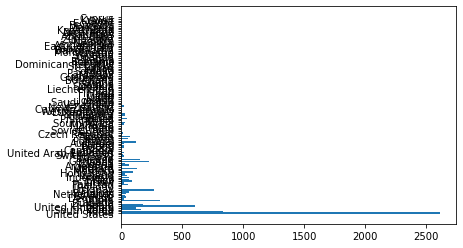

In [49]:
plt.barh(list(mydict.keys()),  list(mydict.values()))

In [52]:
mynew_dict = {key:val for (key,val) in mydict.items() if val > 86}

<BarContainer object of 14 artists>

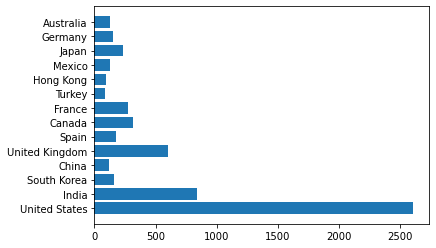

In [53]:
plt.barh(list(mynew_dict.keys()),  list(mynew_dict.values()))

In [71]:
def get_lengths(df, plot=False, ax=None, threshold=0):
    """
    Get the number of arguments in a given dataframe
    
    Argument
    --------
    df      :  pandas.DataFrame
        input data
        
    plot    : bool
        whether or not to plot the data
    ax      : matplotlib ax object
        axes to draw on
    
    Return
    ------
    
    dict : python dictionary
         the lenght of the data
    """
    unstr_list = [i.split(',') for i in list(df.dropna())]
    cleaned_list = [country.strip() for countrylist in unstr_list for country in countrylist]
    
    mydict = {}
    for e in cleaned_list:
        if e not in mydict:
            mydict[e] = 1
        else: mydict[e] += 1

    mynew_dict = {key:val for (key,val) in mydict.items() if val > threshold}
            
    if plot:
        ax1 = ax or plt.gca()
        ax1.barh(list(mynew_dict.keys()),  list(mynew_dict.values()))
        ax1.set_xlabel('number of content') 

    return mynew_dict

{'United States': 2610,
 'India': 838,
 'South Korea': 162,
 'China': 120,
 'United Kingdom': 602,
 'Spain': 178,
 'Canada': 318,
 'France': 271,
 'Mexico': 129,
 'Japan': 231,
 'Germany': 151,
 'Australia': 126}

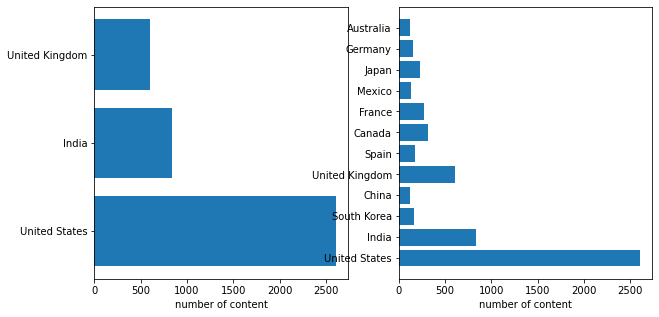

In [70]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

test_dict = get_lengths(df['country'], plot=True, ax=ax1, threshold=500)
get_lengths(df['country'], plot=True, ax=ax2, threshold=100)


In [56]:
test_dict

{'United States': 2610,
 'India': 838,
 'South Korea': 162,
 'China': 120,
 'United Kingdom': 602,
 'Spain': 178,
 'Bulgaria': 8,
 'Canada': 318,
 'Chile': 23,
 'Denmark': 38,
 'Sweden': 33,
 'Netherlands': 37,
 'Belgium': 66,
 'France': 271,
 'Uruguay': 9,
 '': 3,
 'Thailand': 56,
 'Pakistan': 23,
 'Turkey': 87,
 'Brazil': 66,
 'Italy': 67,
 'Indonesia': 52,
 'Ireland': 33,
 'Hong Kong': 97,
 'Morocco': 6,
 'Mexico': 129,
 'Vietnam': 4,
 'Argentina': 68,
 'Nigeria': 36,
 'Japan': 231,
 'Germany': 151,
 'Greece': 8,
 'Norway': 21,
 'Switzerland': 15,
 'United Arab Emirates': 21,
 'Lebanon': 9,
 'Cambodia': 3,
 'Russia': 21,
 'Poland': 27,
 'Israel': 26,
 'Australia': 126,
 'Portugal': 4,
 'Egypt': 54,
 'Taiwan': 75,
 'Austria': 10,
 'Czech Republic': 15,
 'Senegal': 2,
 'Soviet Union': 3,
 'Peru': 9,
 'Ukraine': 3,
 'Malaysia': 21,
 'South Africa': 30,
 'Nepal': 2,
 'Philippines': 47,
 'Serbia': 5,
 'Colombia': 36,
 'Singapore': 30,
 'Luxembourg': 7,
 'West Germany': 5,
 'Cayman Island